In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ewave = pd.read_csv('../easywave/eWave.poi.ssh',delim_whitespace=True)

In [5]:
tseries3min = pd.read_json('../calculations//pois_3min')

In [6]:
rangos = {
    52403: [4,10],
    52406: [4,10],
    55012: [7,13],
    51407: [7,13],
    51425: [7,13],
    46404: [6,12],
    46407: [6,12],
    46411: [6,12],
    46412: [6, 12],
    43412: [12, 18],
    43413: [14, 20],
    32411: [16,22],
    32412: [18,24],
    32413: [16,22],
    32401: [20,26],
    21414: [0,6],
    21419: [0,3],
    21401: [0,3],
    21418: [0,6] ,
    21413: [0,6]
}

In [7]:
tseries3min.head()

,21401,21413,21414,21418,21419,32401,32411,32412,32413,43412,43413,46404,46407,46411,46412,51407,51425,52403,52406,55012
closestDeepPoint,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
depth,5249,5918,5391,5741,5353,4769,3246,4292,3909,3148,3966,2759,3287,4314,3818,4789,4765,4501,1852,3199
location,"[152.583, 42.617]","[152.132, 30.533]","[178.219, 48.968]","[148.645, 38.727]","[155.717, 44.435]","[286.579, -20.474]","[269.12, 4.953]","[273.626, -17.984]","[266.483, -7.406]","[253.03300000000002, 16.045]","[259.91700000000003, 11.012]","[231.267, 45.853]","[231.168, 42.682]","[232.933, 39.333]","[239.437, 32.492]","[203.455, 19.57]","[183.68, -9.517]","[145.52, 4.02]","[164.977, -5.307]","[158.453, -15.664]"
pixel,"[938, 1688]","[932, 1507]","[1323, 1784]","[879, 1630]","[985, 1716]","[2948, 743]","[2686, 1124]","[2753, 780]","[2646, 938]","[2445, 1290]","[2548, 1215]","[2118, 1737]","[2117, 1689]","[2143, 1639]","[2241, 1537]","[1701, 1343]","[1405, 907]","[833, 1110]","[1124, 970]","[1026, 815]"
shallowCorrectionFactor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
ewave.head()

,Minute,21414,21419,21401,21418,21413,52403,52406,55012,51425,...,46404,46407,46411,46412,43412,43413,32411,32412,32413,32401
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]


21414


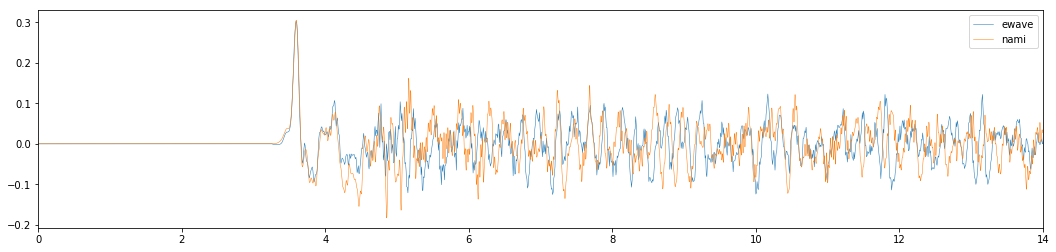

21419


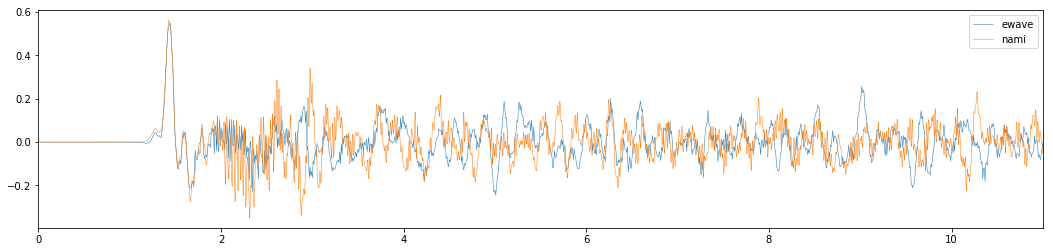

21401


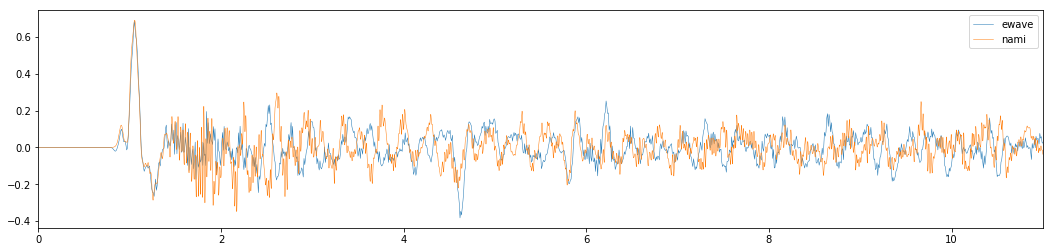

21418


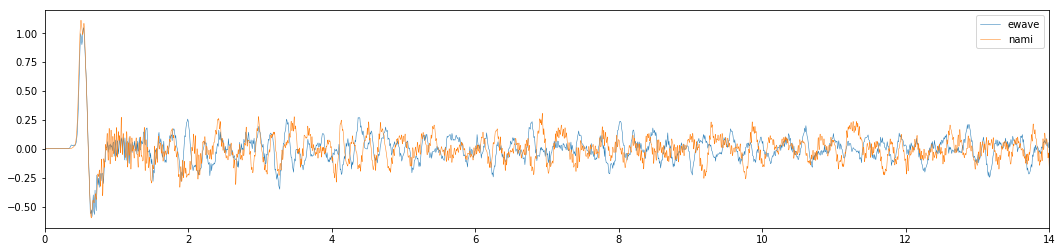

21413


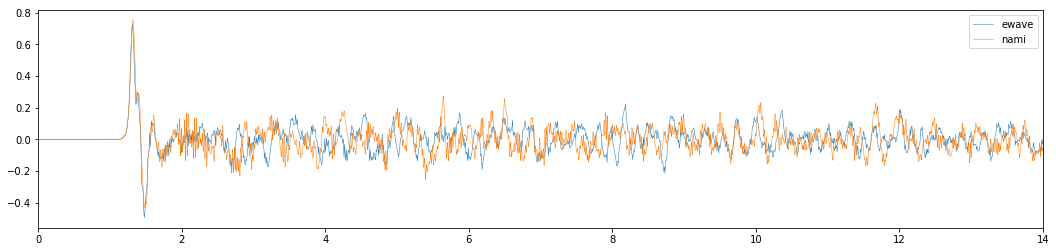

52403


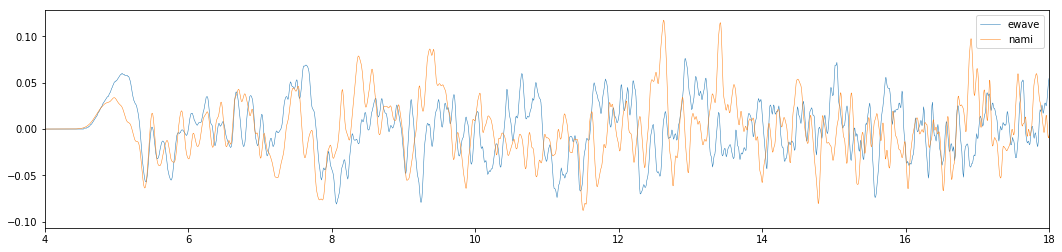

52406


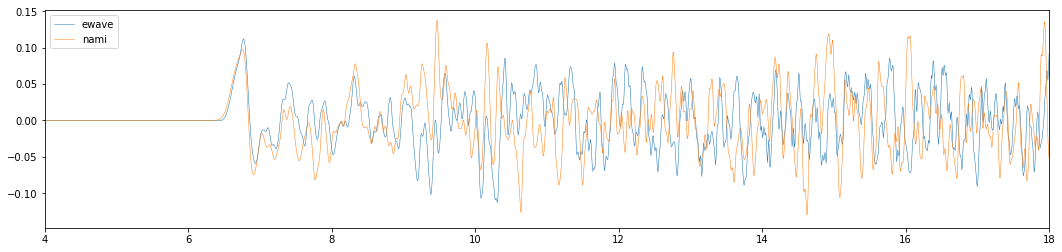

55012


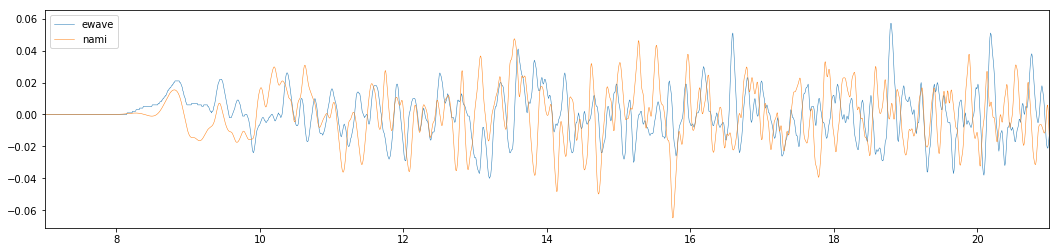

51425


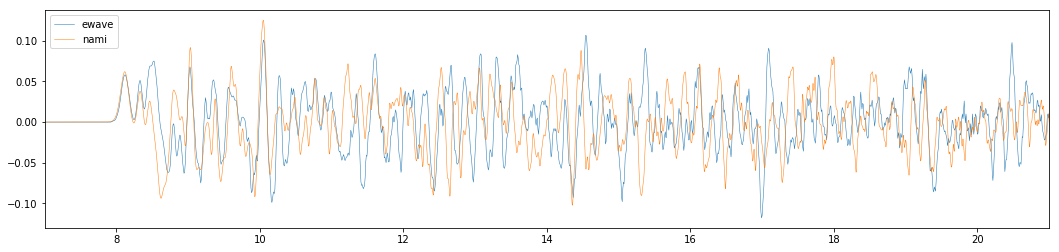

51407


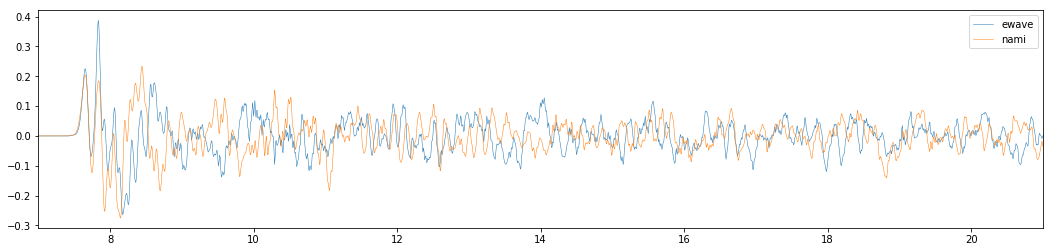

46404


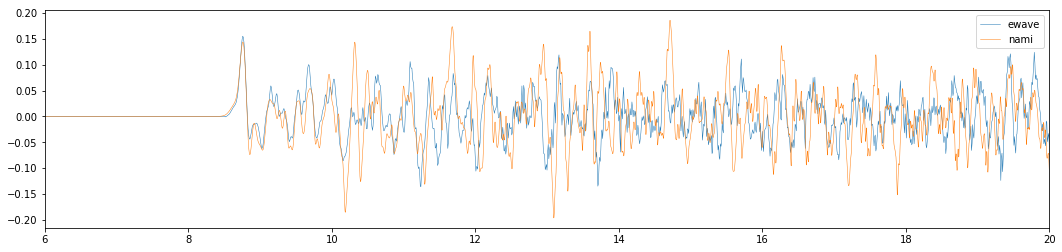

46407


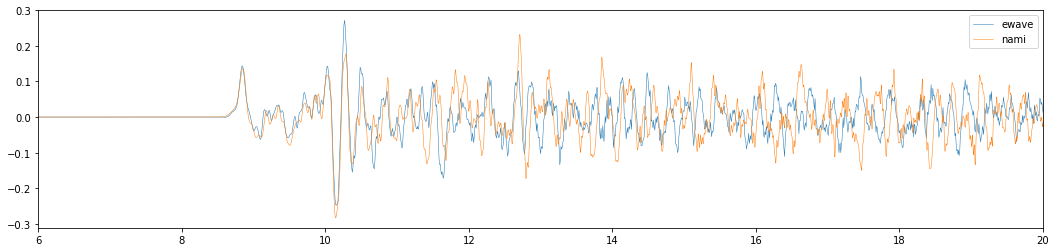

46411


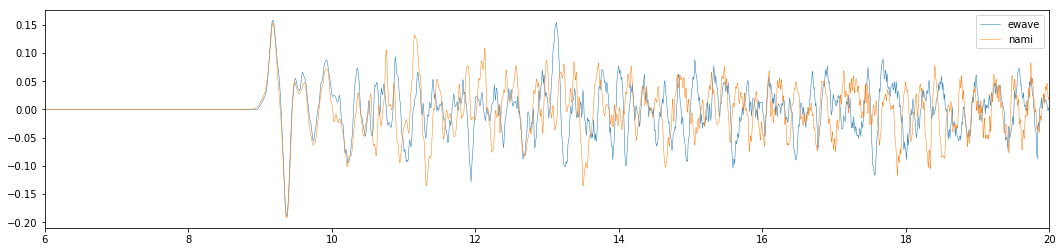

46412


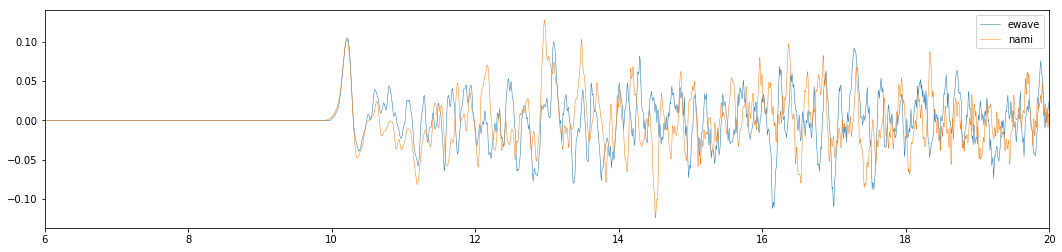

43412


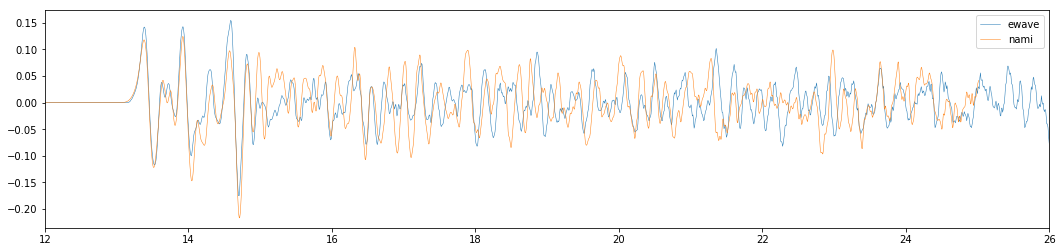

43413


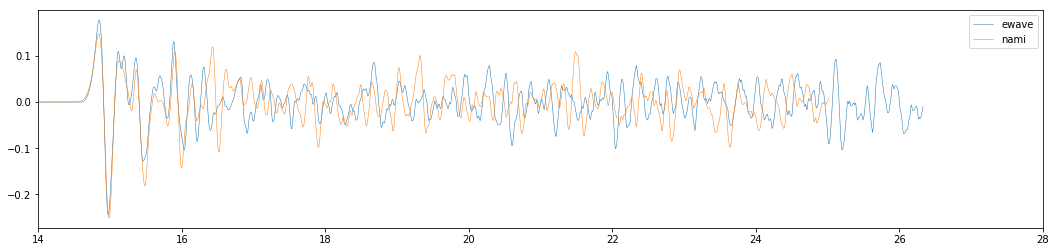

32411


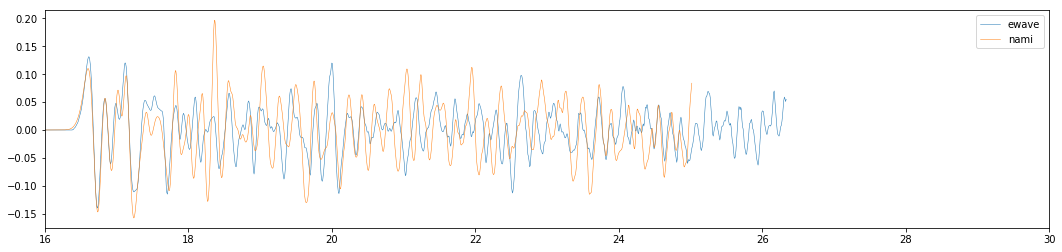

32412


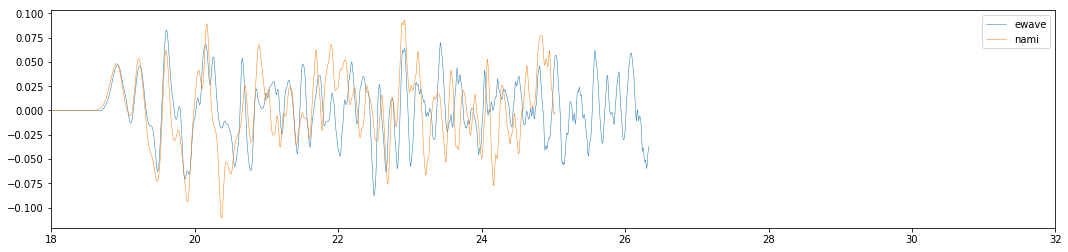

32413


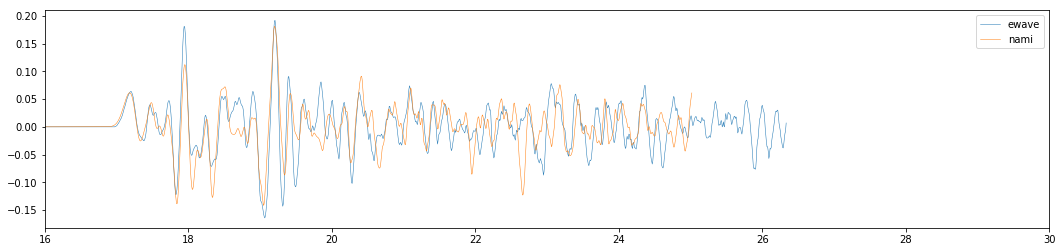

32401


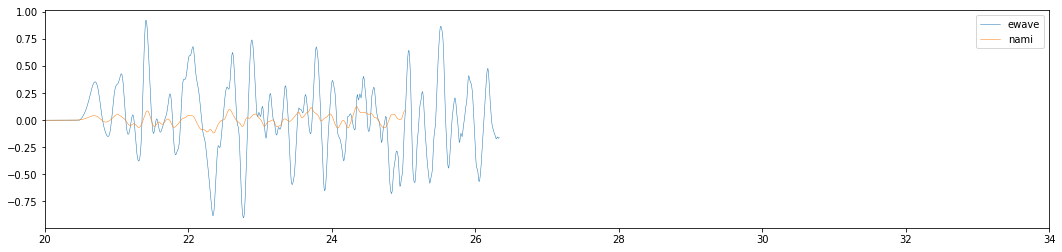

In [11]:
for dart in DARTs:
    plt.figure(figsize=(9*2,2*2))
    plt.plot(ewave['Minute']/60, ewave[str(dart)], label='ewave',lw=0.5)
    plt.legend()
    plt.xlim(rangos[dart][0], rangos[dart][1]+8)
    plt.plot(np.array(tseries3min[dart]['time'])/60/60, tseries3min[dart]['surface'], label='nami', lw=0.5)
    plt.legend()
    plt.xlim(rangos[dart][0], rangos[dart][1]+8)
    print(dart)
    plt.show()
    